In [5]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import matplotlib.pyplot as plt

In [6]:
train_home_team_statistics_df = pd.read_csv('data/Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('data/Train_Data/train_away_team_statistics_df.csv', index_col=0)

#train_home_player_statistics_df = pd.read_csv('data/Train_Data/train_home_player_statistics_df.csv', index_col=0)
#train_away_player_statistics_df = pd.read_csv('data/Train_Data/train_away_player_statistics_df.csv', index_col=0)

goal_diff = pd.read_csv('data/benchmark_and_extras/Y_train_supp.csv', index_col=0)

train_scores = pd.read_csv('data/Y_train.csv', index_col=0)

train_home = train_home_team_statistics_df.iloc[:,2:]
train_away = train_away_team_statistics_df.iloc[:,2:]

train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns



In [7]:
train_home_team_statistics_df.head()

,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [8]:
train_away_team_statistics_df.head()

,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Olympique Marseille,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,Ligue 2,Red Star,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,Serie A,Bologna,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,League One,Bolton Wanderers,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,NaN,2.0
4,Premier League,Leicester City,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0


In [12]:
train_data = pd.concat([train_home, train_away], join='inner', axis=1)
train_data = train_data.fillna(0)

train_scores = train_scores.loc[train_data.index]

train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan})
print(train_scores.head())

    HOME_WINS  DRAW  AWAY_WINS
ID                            
0           0     0          1
1           0     1          0
2           0     0          1
3           1     0          0
4           0     1          0


In [50]:
train_new_y = train_scores[['HOME_WINS', 'DRAW', 'AWAY_WINS']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_new_y, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)



## Random Forest Classifier

chaque feature = un arbre qui vas voté pour un résultat

reusltat final = le rusltat le plus voté

In [32]:
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.17472572125152377

Résultat de cette méthode sans pondération des features : <b>17~19 %</b> (pas fou)

In [25]:
# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 20 features
top_20_features = feature_importances.head(20)
print(top_20_features)

                                        Feature  Importance
23         HOME_TEAM_SHOTS_TOTAL_season_average    0.005995
20                HOME_TEAM_GAME_WON_season_sum    0.005325
3          HOME_TEAM_SHOTS_ON_TARGET_season_sum    0.005288
160               AWAY_TEAM_GAME_WON_season_sum    0.005144
173    AWAY_TEAM_BALL_POSSESSION_season_average    0.005121
185           AWAY_TEAM_GAME_WON_season_average    0.004994
162              AWAY_TEAM_GAME_LOST_season_sum    0.004990
47           HOME_TEAM_GAME_LOST_season_average    0.004873
22               HOME_TEAM_GAME_LOST_season_sum    0.004860
187          AWAY_TEAM_GAME_LOST_season_average    0.004828
45            HOME_TEAM_GAME_WON_season_average    0.004727
268  AWAY_TEAM_BALL_POSSESSION_5_last_match_std    0.004674
198        AWAY_TEAM_BALL_POSSESSION_season_std    0.004502
17       HOME_TEAM_DANGEROUS_ATTACKS_season_sum    0.004469
130      HOME_TEAM_YELLOWCARDS_5_last_match_std    0.004445
26     HOME_TEAM_SHOTS_ON_TARGET_season_

Les features qui semble avoir le plus d'impact sont assez logique: nombre de tire moyen dans la saison, nombre de match gagné / perdu. Essayon de nous concentré seulement sur ces feature.

In [47]:
# Filter X_train to keep only the top 50 features
top_50_features = feature_importances.head(50)['Feature']
X_train_top_50 = X_train[top_50_features]
X_test_top_50 = X_test[top_50_features]

clf.fit(X_train_top_50, y_train)

y_pred = clf.predict(X_test_top_50)
print("TOP 50 features: " + str(accuracy_score(y_test, y_pred)))

# Filter X_train to keep only the top 20 features
top_20_features = feature_importances.head(20)['Feature']
X_train_top_20 = X_train[top_20_features]
X_test_top_20 = X_test[top_20_features]

clf.fit(X_train_top_20, y_train)

y_pred = clf.predict(X_test_top_20)
print("TOP 20 features: " + str(accuracy_score(y_test, y_pred)))

# Filter X_train to keep only the top 5 features
top_5_features = feature_importances.head(5)['Feature']
X_train_top_5 = X_train[top_5_features]
X_test_top_5 = X_test[top_5_features]

clf.fit(X_train_top_5, y_train)

y_pred = clf.predict(X_test_top_5)
print("TOP 5 features: " + str(accuracy_score(y_test, y_pred)))

TOP 50 features: 0.1901665989435189
TOP 20 features: 0.20601381552214548
TOP 5 features: 0.30069077610727346


On semble faire un shouïa mieux en gardant seulement les features les plus importantes -> plus on retire de feature plus le score augmente (attention tout de même ici 33% est le pire score => notre model pif complet et ne comprend a priori rien de spéciale)

## XGBoost

version "améliroer" des model d'arbre. Utilise de l'optimisation incrémentale comparer a random forest.

In [71]:
# XGBoost
model = xgb.XGBClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("XGBoost: " + str(accuracy_score(y_test, y_pred)))

XGBoost: 0.2771231206826493


Avec toutes les features XGBoost donner une précision de <b>~27%</b>. C'est sensiblement mieux que random forest mais toujours pire que le hasard !

Essayon d'isolé des features

In [52]:
# XGBoost avec les 50 features les plus importantes
model = xgb.XGBClassifier(n_estimators=1000, random_state=42, objective='multi:softprob')
model.fit(X_train_top_50, y_train)

y_pred = model.predict(X_test_top_50)
print("XGBoost TOP 50 features: " + str(accuracy_score(y_test, y_pred)))

# XGBoost avec les 20 features les plus importantes
model.fit(X_train_top_20, y_train)

y_pred = model.predict(X_test_top_20)
print("XGBoost TOP 20 features: " + str(accuracy_score(y_test, y_pred)))

# XGBoost avec les 5 features les plus importantes
model.fit(X_train_top_5, y_train)

y_pred = model.predict(X_test_top_5)
print("XGBoost TOP 5 features: " + str(accuracy_score(y_test, y_pred)))

XGBoost TOP 50 features: 0.28931328728159283
XGBoost TOP 20 features: 0.2897196261682243
XGBoost TOP 5 features: 0.3100365704997968


Même resultat ici, moins on a de feature + le score est élevé

In [66]:
print(pd.value_counts(y_train['HOME_WINS']))
print(pd.value_counts(y_train['DRAW']))
print(pd.value_counts(y_train['AWAY_WINS']))

HOME_WINS
0    4480
1    3393
Name: count, dtype: int64
DRAW
0    5820
1    2053
Name: count, dtype: int64
AWAY_WINS
0    5446
1    2427
Name: count, dtype: int64


C:\Users\sebsa\AppData\Local\Temp\ipykernel_6876\2646861523.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_train['HOME_WINS']))
C:\Users\sebsa\AppData\Local\Temp\ipykernel_6876\2646861523.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_train['DRAW']))
C:\Users\sebsa\AppData\Local\Temp\ipykernel_6876\2646861523.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_train['AWAY_WINS']))


On remarque que les reusltats possible sont legerment déséquilibré, il y a significativement plus de vistoire a domicile que le reste.

In [67]:
# Calculate the scale_pos_weight
home_wins_count = y_train['HOME_WINS'].sum()
total_count = len(y_train)
scale_pos_weight = (total_count - home_wins_count) / home_wins_count

# XGBoost with scale_pos_weight
model = xgb.XGBClassifier(n_estimators=1000, random_state=42, scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("XGBoost with scale_pos_weight: " + str(accuracy_score(y_test, y_pred)))

XGBoost with scale_pos_weight: 0.2889069483949614


Corriger le poid fait legèrement mieux on a <b>28~29 %</B> plutot que 27. Ca reste quand même toujours plus nul que le hasard

## Neural Engine

le cerveau là

In [88]:
from setuptools import distutils
import tensorflow as tf

In [89]:
# data perparation

normalized_train_data = (train_data - train_data.mean()) / train_data.std()
normalized_train_data = normalized_train_data.fillna(0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(normalized_train_data, train_new_y, train_size=0.8, random_state=42)

nb_inpiuts = X_train.shape[1]
nb_outputs = y_train.shape[1]
print(nb_inpiuts, nb_outputs)

280 3


In [ ]:
# first model attempt

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(nb_inpiuts,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(nb_outputs, activation='softmax')
])

C:\Users\sebsa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4559 - loss: 1.0599 - val_accuracy: 0.4937 - val_loss: 1.0330
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5080 - loss: 0.9908 - val_accuracy: 0.4714 - val_loss: 1.0362
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5462 - loss: 0.9490 - val_accuracy: 0.4742 - val_loss: 1.0644
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5882 - loss: 0.8955 - val_accuracy: 0.4714 - val_loss: 1.0980
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6452 - loss: 0.8048 - val_accuracy: 0.3990 - val_loss: 1.1782
Epoch 6/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6872 - loss: 0.7158 - val_accuracy: 0.4360 - val_loss: 1.2939
Epoch 7/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7718 - loss: 0.5790 - val_accuracy: 0.4258 - val_loss: 1.4428
Epoch 8/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8212 - loss: 0.4619 - val_accuracy: 0.

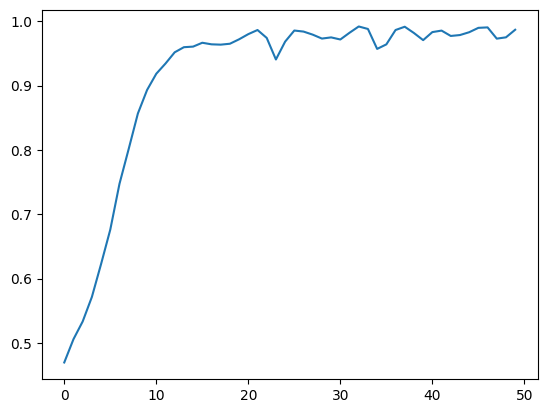

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

plt.plot(training.history['accuracy'], label='accuracy')

In [92]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test.to_numpy(), axis=1)
print("Neural Network: " + str(accuracy_score(y_test, y_pred)))

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Neural Network: 0.39455505891913856


On fait mieux que le hasard ENFIN ! Notre petit model obtient <b>39~41 %</b>. Ce score est obtenu avec 50 epoch, mais on remarque qu'après une vingtaine d'epoch le score n'évolue plus vraiment

Epoch 1/60


C:\Users\sebsa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4785 - loss: 1.0386 - val_accuracy: 0.4856 - val_loss: 1.0264
Epoch 2/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4972 - loss: 1.0074 - val_accuracy: 0.4852 - val_loss: 1.0294
Epoch 3/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5207 - loss: 0.9880 - val_accuracy: 0.4779 - val_loss: 1.0356
Epoch 4/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5279 - loss: 0.9765 - val_accuracy: 0.4649 - val_loss: 1.0511
Epoch 5/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5462 - loss: 0.9494 - val_accuracy: 0.4742 - val_loss: 1.0692
Epoch 6/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5667 - loss: 0.9195 - val_accuracy: 0.4734 - val_loss: 1.0966
Epoch 7/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6003 - loss: 0.8724 - val_accuracy: 0.4478 - val_loss: 1.1300
Epoch 8/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6391 - loss: 0.8199 - val_accuracy: 0.4478 - val_

C:\Users\sebsa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4717 - loss: 1.0387 - val_accuracy: 0.4738 - val_loss: 1.0336
Epoch 2/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4996 - loss: 1.0140 - val_accuracy: 0.4827 - val_loss: 1.0305
Epoch 3/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4968 - loss: 1.0144 - val_accuracy: 0.4839 - val_loss: 1.0334
Epoch 4/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5005 - loss: 1.0097 - val_accuracy: 0.4856 - val_loss: 1.0348
Epoch 5/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5088 - loss: 0.9966 - val_accuracy: 0.4588 - val_loss: 1.0459
Epoch 6/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5161 - loss: 0.9887 - val_accuracy: 0.4811 - val_loss: 1.0384
Epoch 7/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5158 - loss: 0.9849 - val_accuracy: 0.4758 - val_loss: 1.0489
Epoch 8/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5275 - loss: 0.9718 - val_accuracy: 0.4579 - val_

C:\Users\sebsa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4703 - loss: 1.0386 - val_accuracy: 0.4856 - val_loss: 1.0376
Epoch 2/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4924 - loss: 1.0255 - val_accuracy: 0.4852 - val_loss: 1.0322
Epoch 3/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4868 - loss: 1.0238 - val_accuracy: 0.4864 - val_loss: 1.0319
Epoch 4/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4843 - loss: 1.0261 - val_accuracy: 0.4815 - val_loss: 1.0314
Epoch 5/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4955 - loss: 1.0203 - val_accuracy: 0.4839 - val_loss: 1.0320
Epoch 6/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4921 - loss: 1.0187 - val_accuracy: 0.4856 - val_loss: 1.0315
Epoch 7/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4922 - loss: 1.0188 - val_accuracy: 0.4815 - val_loss: 1.0382
Epoch 8/60
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4948 - loss: 1.0196 - val_accuracy: 0.4852 - val_

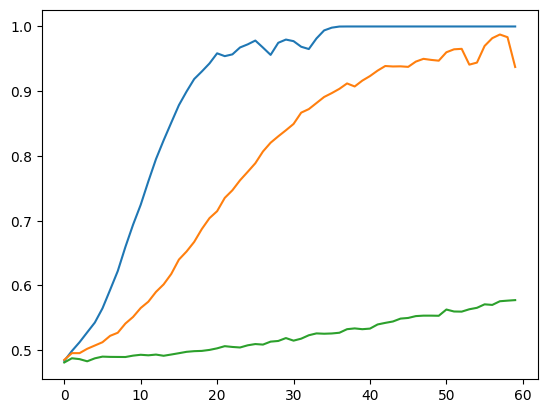

In [111]:
# Teston le petit model avec les X features les plus importantes

X_train, X_test, y_train, y_test = model_selection.train_test_split(normalized_train_data, train_new_y, train_size=0.8, random_state=42)

# Top 50 features
X_train_TOP50 = X_train[top_50_features]
X_test_TOP50 = X_test[top_50_features]

model_TOP50 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(50,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(nb_outputs, activation='softmax')
])

model_TOP50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training = model_TOP50.fit(X_train_TOP50, y_train, epochs=60, batch_size=32, validation_data=(X_test_TOP50, y_test))

plt.plot(training.history['accuracy'], label='accuracy top 50')

# Top 20 features
X_train_TOP20 = X_train[top_20_features]
X_test_TOP20 = X_test[top_20_features]

model_TOP20 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(nb_outputs, activation='softmax')
])

model_TOP20.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training = model_TOP20.fit(X_train_TOP20, y_train, epochs=60, batch_size=32, validation_data=(X_test_TOP20, y_test))

plt.plot(training.history['accuracy'], label='accuracy top 20')

# Top 5 features
X_train_TOP5 = X_train[top_5_features]
X_test_TOP5 = X_test[top_5_features]

model_TOP5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(nb_outputs, activation='softmax')
])

model_TOP5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
training = model_TOP5.fit(X_train_TOP5, y_train, epochs=60, batch_size=32, validation_data=(X_test_TOP5, y_test))

plt.plot(training.history['accuracy'], label='accuracy top 5')

In [113]:
# Accuracy for the model with top 50 features
y_pred_TOP50 = model_TOP50.predict(X_test_TOP50)
y_pred_TOP50 = np.argmax(y_pred_TOP50, axis=1)
y_test_TOP50 = np.argmax(y_test.to_numpy(), axis=1)
accuracy_TOP50 = accuracy_score(y_test_TOP50, y_pred_TOP50)
print("Neural Network TOP 50 features: " + str(accuracy_TOP50))

# Accuracy for the model with top 20 features
y_pred_TOP20 = model_TOP20.predict(X_test_TOP20)
y_pred_TOP20 = np.argmax(y_pred_TOP20, axis=1)
y_test_TOP20 = np.argmax(y_test.to_numpy(), axis=1)
accuracy_TOP20 = accuracy_score(y_test_TOP20, y_pred_TOP20)
print("Neural Network TOP 20 features: " + str(accuracy_TOP20))

# Accuracy for the model with top 5 features
y_pred_TOP5 = model_TOP5.predict(X_test_TOP5)
y_pred_TOP5 = np.argmax(y_pred_TOP5, axis=1)
y_test_TOP5 = np.argmax(y_test.to_numpy(), axis=1)
accuracy_TOP5 = accuracy_score(y_test_TOP5, y_pred_TOP5)
print("Neural Network TOP 5 features: " + str(accuracy_TOP5))

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
Neural Network TOP 50 features: 0.39699309223892726
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network TOP 20 features: 0.407557903291345
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network TOP 5 features: 0.43843965867533524


On sélectionnant les features, sur le même découpage test/train. Notre model Fait beaucoup mieux avec le TOP 5 des features ! Pour le top 50 on a <b>39.6%</b>, pour le top 20 on a <b>40.07%</b> et pour le top 5 on a <b>43.8%</b>

essayon notre meilleur model sur le jeu de test

In [118]:
test_home_team_statistics_df = pd.read_csv('data/Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away_team_statistics_df = pd.read_csv('data/Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home_team_statistics_df.columns = 'HOME_' + test_home_team_statistics_df.columns
test_away_team_statistics_df.columns = 'AWAY_' + test_away_team_statistics_df.columns

test_data = pd.concat([test_home_team_statistics_df, test_away_team_statistics_df], join='inner', axis=1)
test_data = test_data.fillna(0)

print(test_data.head())

test_scores = pd.read_csv('data/Y_test_random.csv', index_col=0)

       HOME_TEAM_SHOTS_TOTAL_season_sum  HOME_TEAM_SHOTS_INSIDEBOX_season_sum  \
ID                                                                              
12303                               3.0                                   6.0   
12304                               3.0                                   2.0   
12305                               7.0                                  10.0   
12306                               5.0                                   7.0   
12307                               5.0                                   4.0   

       HOME_TEAM_SHOTS_OFF_TARGET_season_sum  \
ID                                             
12303                                    5.0   
12304                                    4.0   
12305                                    8.0   
12306                                    5.0   
12307                                    6.0   

       HOME_TEAM_SHOTS_ON_TARGET_season_sum  \
ID                                            
1

In [ ]:
y_pred_TOP5 = model_TOP5.predict(test_data[top_5_features])
y_pred_TOP5 = np.argmax(y_pred_TOP5, axis=1)
y_test_TOP5 = np.argmax(test_scores.to_numpy(), axis=1)
accuracy_TOP5 = accuracy_score(y_test_TOP5, y_pred_TOP5)
print("Neural Network TOP 5 features: " + str(accuracy_TOP5))

793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step
Neural Network TOP 5 features: 0.32962787764112267


COUP DUR